# Plots

In [2]:
import matplotlib.pyplot as plt

In [4]:
mistral = {
    "total": 0.4,
    "extrinsic-NP": 0.30864197530864196,
    "extrinsic-predicate": 0.30864197530864196,
    "intrinsic-NP": 0.3333333333333333,
    "intrinsic-predicate": 0.30952380952380953,
    "correct": 0.6923076923076923
}

llama = {
    "total": 0.325,
    "extrinsic-NP": 0.21428571428571427,
    "extrinsic-predicate": 0.10204081632653061,
    "intrinsic-NP": 0.38461538461538464,
    "intrinsic-predicate": 0.2702702702702703,
    "correct": 0.7215189873417721
}

gemma = {
    "total": 0.31329113924050633,
    "extrinsic-NP": 0.4625,
    "extrinsic-predicate": 0.10975609756097561,
    "intrinsic-NP": 0.19117647058823528,
    "intrinsic-predicate": 0.20512820512820512,
    "correct": 0.6808510638297872
}

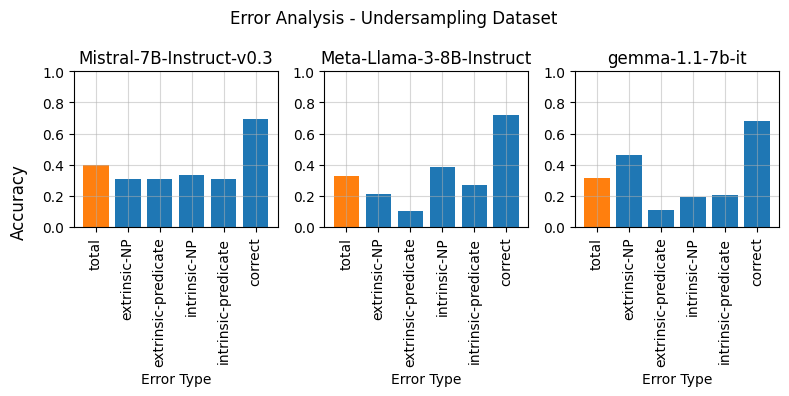

In [28]:
# List of data dictionaries
datasets = [mistral, llama, gemma]
labels = ["Mistral-7B-Instruct-v0.3", "Meta-Llama-3-8B-Instruct", "gemma-1.1-7b-it"]

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through datasets and axes
for i, (data, ax) in enumerate(zip(datasets, axs)):
    keys = list(data.keys())
    values = list(data.values())
    # Assign colors: Red for 'total', blue for others
    colors = ['C1' if key == 'total' else 'C0' for key in keys]

    ax.bar(keys, values, color=colors)
    ax.set_title(f'{labels[i]}')
    ax.set_ylim(0, 1)  # Assuming values are in the range 0 to 1
    ax.set_xlabel('Error Type')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    ax.grid('--', alpha=0.5)

fig.supylabel('Accuracy')
fig.suptitle('Error Analysis - Undersampling Dataset')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()